<a href="https://colab.research.google.com/github/alonsosilvaallende/Desigualdad-Covid19/blob/master/Tasa_de_mortalidad_ajustada_diferenciando_confirmado_y_sospechoso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'xtick.labelsize' : 15,
                     'ytick.labelsize' : 15})

In [2]:
# Web scrapping
import requests
from bs4 import BeautifulSoup
import lxml.html as lh

Datos: https://deis.minsal.cl/

In [3]:
!wget http://deis.minsal.cl/wp-content/uploads/2020/09/DEFUNCIONES_FUENTE_DEIS_2016_2020_10092020.rar

--2020-09-14 13:32:02--  http://deis.minsal.cl/wp-content/uploads/2020/09/DEFUNCIONES_FUENTE_DEIS_2016_2020_10092020.rar
Resolving deis.minsal.cl (deis.minsal.cl)... 163.247.51.55
Connecting to deis.minsal.cl (deis.minsal.cl)|163.247.51.55|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://deis.minsal.cl/wp-content/uploads/2020/09/DEFUNCIONES_FUENTE_DEIS_2016_2020_10092020.rar [following]
--2020-09-14 13:32:02--  https://deis.minsal.cl/wp-content/uploads/2020/09/DEFUNCIONES_FUENTE_DEIS_2016_2020_10092020.rar
Connecting to deis.minsal.cl (deis.minsal.cl)|163.247.51.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4524890 (4.3M)
Saving to: ‘DEFUNCIONES_FUENTE_DEIS_2016_2020_10092020.rar.1’

DEFUNCIONES_FUENTE_ 100%[===================>]   4.31M  2.87MB/s    in 1.5s    

2020-09-14 13:32:05 (2.87 MB/s) - ‘DEFUNCIONES_FUENTE_DEIS_2016_2020_10092020.rar.1’ saved [4524890/4524890]



In [4]:
!unrar x DEFUNCIONES_FUENTE_DEIS_2016_2020_10092020.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from DEFUNCIONES_FUENTE_DEIS_2016_2020_10092020.rar


Would you like to replace the existing file DEFUNCIONES_FUENTE_DEIS_2016_2020_10092020.csv
149293087 bytes, modified on 2020-09-10 21:58
with a new one
149293087 bytes, modified on 2020-09-10 21:58

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Y

Extracting  DEFUNCIONES_FUENTE_DEIS_2016_2020_10092020.csv                92% 99%  OK 

Would you like to replace the existing file Diccionario de Datos BBDD-COVID19 liberada.xlsx
 29948 bytes, modified on 2020-08-20 19:51
with a new one
 29948 bytes, modified on 2020-08-20 19:51

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit A

Extracting  Diccionario de Datos BBDD-COVID19 liberada.xlsx               99%  OK 
All OK


In [5]:
data_raw = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2016_2020_10092020.csv",
                       header=None,
                       names=["año", "fecha", "genero", "edad_tipo", "edad", "comuna_codigo", "comuna", "region", "c_causa_detalle", "c_capitulo", "causa", "Unnamed: 11","Unnamed: 12","c_causa","Unnamed: 14","Unnamed: 15","causa_1", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "Unnamed: 21", "Unnamed: 22", "Unnamed: 23", "Unnamed: 24", "Unnamed: 25"],
                       encoding='iso-8859-1', sep=";")

In [6]:
data_raw.head(3)

,año,fecha,genero,edad_tipo,edad,comuna_codigo,comuna,region,c_causa_detalle,c_capitulo,causa,Unnamed: 11,Unnamed: 12,c_causa,Unnamed: 14,Unnamed: 15,causa_1,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,2020,2020-08-14,Hombre,1,79,13128,Renca,Metropolitana de Santiago,J449,J00-J99,Enfermedades del sistema respiratorio,J40-J47,Enfermedades crónicas de las vías respiratoria...,J44,Otras enfermedades pulmonares obstructivas cró...,J449,ENFERMEDAD PULMÓNAR OBSTRUCTIVA CRONICA NO ESP...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,2020-02-12,Mujer,1,87,13118,Macul,Metropolitana de Santiago,K729,K00-K93,Enfermedades del sistema digestivo,K70-K77,Enfermedades del hígado,K72,"Insuficiencia hepática, no clasificada en otra...",K729,INSUFICIENCIA HEPATICA NO ESPECIFICADA,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,2020-04-22,Hombre,1,83,5602,Algarrobo,De Valparaíso,J449,J00-J99,Enfermedades del sistema respiratorio,J40-J47,Enfermedades crónicas de las vías respiratoria...,J44,Otras enfermedades pulmonares obstructivas cró...,J449,ENFERMEDAD PULMÓNAR OBSTRUCTIVA CRONICA NO ESP...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data_raw.query("c_causa == 'U07'").head(10)

,año,fecha,genero,edad_tipo,edad,comuna_codigo,comuna,region,c_causa_detalle,c_capitulo,causa,Unnamed: 11,Unnamed: 12,c_causa,Unnamed: 14,Unnamed: 15,causa_1,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
4,2020,2020-08-31,Hombre,1,76,13103,Cerro Navia,Metropolitana de Santiago,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2020,2020-05-23,Hombre,1,78,13108,Independencia,Metropolitana de Santiago,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,2020,2020-05-26,Hombre,1,75,13104,Conchalí,Metropolitana de Santiago,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,2020,2020-05-27,Hombre,1,78,13120,Ñuñoa,Metropolitana de Santiago,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,2020,2020-06-11,Mujer,1,84,13112,La Pintana,Metropolitana de Santiago,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2020,2020-09-06,Mujer,1,85,13111,La Granja,Metropolitana de Santiago,U072,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U072,COVID-19 virus no identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,2020,2020-05-24,Hombre,1,79,13108,Independencia,Metropolitana de Santiago,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,2020,2020-08-24,Hombre,1,81,13104,Conchalí,Metropolitana de Santiago,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,2020,2020-05-11,Hombre,1,78,5605,El Tabo,De Valparaíso,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,2020,2020-06-24,Mujer,1,88,13125,Quilicura,Metropolitana de Santiago,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data_RM = data_raw.query("region == 'Metropolitana de Santiago' & c_causa == 'U07'")

In [9]:
len(data_RM), len(data_raw.query("c_causa == 'U07'")), len(data_RM)/len(data_raw.query("c_causa == 'U07'"))

(11505, 16222, 0.7092220441375909)

In [10]:
len(data_raw.query("region == 'Metropolitana de Santiago' & c_causa_detalle == 'U071'")), len(data_raw.query("c_causa_detalle == 'U071'")), len(data_raw.query("region == 'Metropolitana de Santiago' & c_causa_detalle == 'U071'"))/len(data_raw.query("c_causa_detalle == 'U071'"))

(8838, 11895, 0.743001261034048)

In [11]:
deaths = data_RM.groupby(["c_causa_detalle","comuna"]).count()["causa"]

In [12]:
deaths = deaths.reset_index()

In [13]:
deaths.head()

,c_causa_detalle,comuna,causa
0,U071,Alhué,4
1,U071,Buin,100
2,U071,Calera de Tango,10
3,U071,Cerrillos,72
4,U071,Cerro Navia,288


In [14]:
confirmed_deaths = deaths[deaths["c_causa_detalle"] == "U071"].drop(columns="c_causa_detalle").set_index("comuna")

In [15]:
suspected_deaths = deaths[deaths["c_causa_detalle"] == "U072"].drop(columns="c_causa_detalle").set_index("comuna")

In [16]:
df = pd.DataFrame()
df["Comuna"] = data_RM["comuna"].unique()
df = df.set_index("Comuna")

In [17]:
df["COVID Confirmado"] = confirmed_deaths
df["COVID Sospechoso"] = suspected_deaths

Crear un dataframe con las comunas de la conurbación de Santiago y el sector al que pertenecen.
Datos: https://es.wikipedia.org/wiki/Anexo:Comunas_de_Santiago_de_Chile#Conurbaci%C3%B3n_de_Santiago

In [18]:
url = "https://es.wikipedia.org/wiki/Anexo:Comunas_de_Santiago_de_Chile#Conurbaci%C3%B3n_de_Santiago"

In [19]:
res = requests.get(url).text
soup = BeautifulSoup(res,'lxml')
soup.prettify()

table = soup.find('table',{'class':'wikitable sortable'}).find_all('tr')[1:]

In [20]:
#We create a DataFrame of the Santiago neighborhood's according to wikipedia:
df_stgo = pd.DataFrame(columns = ['Comuna','Sector'], index = None)
for items in table:
    data = items.find_all(['th','td'])
    name = data[0].text
    borough = data[1].text
    df_stgo = df_stgo.append({'Comuna':name,
                              'Sector':borough}, ignore_index = True)

In [21]:
df_stgo

,Comuna,Sector
0,Cerrillos,surponiente
1,Cerro Navia,norponiente
2,Conchalí,norte
3,El Bosque,sur
4,Estación Central,surponiente
5,Huechuraba,norte
6,Independencia,norte
7,La Cisterna,sur
8,La Florida,suroriente
9,La Granja,sur


In [22]:
lista = list(df_stgo["Comuna"])

In [23]:
df = df.T[lista].T

In [24]:
df["Total"] = df["COVID Confirmado"] + df["COVID Sospechoso"]

In [25]:
df = df.sort_values(by="Total", ascending=True)

In [26]:
df = df.rename(columns={'COVID Confirmado': 'COVID-19 Confirmado', 'COVID Sospechoso': 'COVID-19 Sospechoso'})

In [27]:
last_date = pd.to_datetime(data_RM["fecha"], format='%Y-%m-%d').sort_values().iloc[-1].strftime('%Y-%m-%d')
report_date = (pd.to_datetime(last_date) + pd.DateOffset(days=1)).strftime('%Y-%m-%d')
last_date, report_date

('2020-09-09', '2020-09-10')

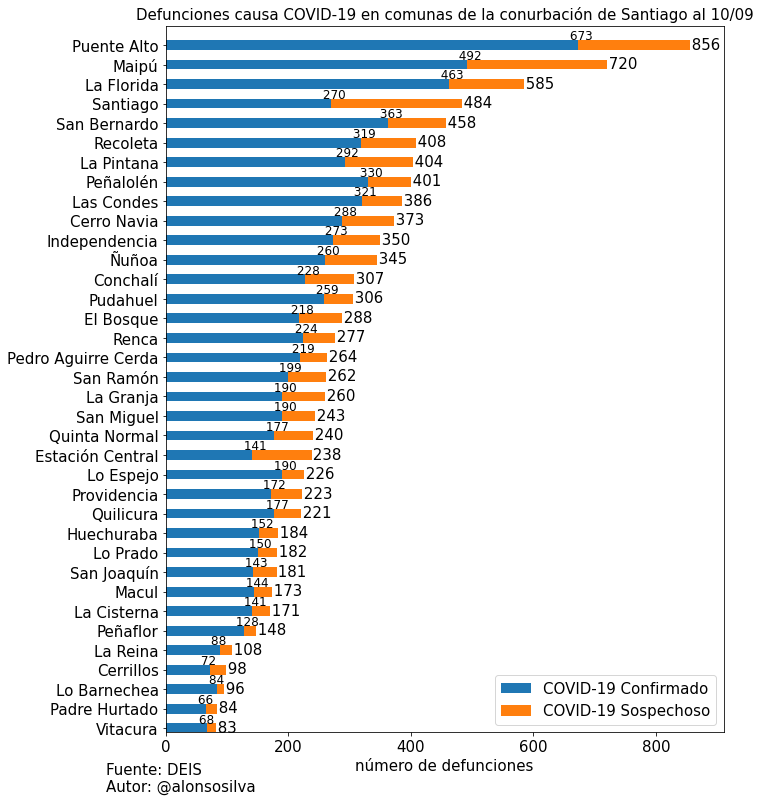

In [28]:
fig, ax = plt.subplots(figsize=(10,13))
df[["COVID-19 Confirmado", "COVID-19 Sospechoso"]].plot.barh(stacked=True, ax=ax)
for i, val in enumerate(df['COVID-19 Confirmado']):
    ax.text(val-20, i+0.28,f" {val:.0f}", fontsize=12)
for i, val in enumerate(df['Total']):
    ax.text(val-5, i-0.2,f" {val:.0f}", fontsize=15)
ax.legend(fontsize=15)
ax.set_xlim(0,910)
ax.set_ylim(-.2,len(df))
ax.set_ylabel("", fontsize=15)
ax.set_xlabel("número de defunciones", fontsize=15)
ax.set_title(f"Defunciones causa COVID-19 en comunas de la conurbación de Santiago al {pd.to_datetime(report_date).strftime('%d/%m')}", fontsize=15)
plt.annotate('Fuente: DEIS\nAutor: @alonsosilva', (0,0), (-60,-30), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=15)
# plt.savefig('2020-09-10-Muertes-por-comuna.png', bbox_inches='tight', format='png', dvi=8000)
plt.show()

In [29]:
df["Total"].sum(), df["Total"].sum()/len(data_raw.query("c_causa == 'U07'")), df["Total"].sum()/len(data_RM)

(10633.0, 0.6554678831216866, 0.9242068665797479)

In [30]:
df["COVID-19 Confirmado"].sum(), df["COVID-19 Confirmado"].sum()/len(data_raw.query("c_causa_detalle == 'U071'")), df["COVID-19 Confirmado"].sum()/len(data_raw.query("c_causa_detalle == 'U071' & region == 'Metropolitana de Santiago'"))

(8164.0, 0.6863387978142077, 0.9237384023534736)

In [31]:
# download INE 2017 county population data
county_population_raw = pd.read_csv(
    #"https://raw.githubusercontent.com/alonsosilvaallende/COVID-19/master/data/ine_estimaciones-y-proyecciones-2002-2035_base-2017_comunas0381d25bc2224f51b9770a705a434b74.csv",
    "http://www.ine.cl/docs/default-source/proyecciones-de-poblacion/cuadros-estadisticos/base-2017/ine_estimaciones-y-proyecciones-2002-2035_base-2017_comunas0381d25bc2224f51b9770a705a434b74.csv",
    encoding='ISO-8859-1', sep=",", thousands='.')

In [32]:
county_population_raw.head()

,Region,Nombre Region,Provincia,Nombre Provincia,Comuna,Nombre Comuna,Sexo (1=Hombre 2=Mujer),Edad,Poblacion 2002,Poblacion 2003,Poblacion 2004,Poblacion 2005,Poblacion 2006,Poblacion 2007,Poblacion 2008,Poblacion 2009,Poblacion 2010,Poblacion 2011,Poblacion 2012,Poblacion 2013,Poblacion 2014,Poblacion 2015,Poblacion 2016,Poblacion 2017,Poblacion 2018,Poblacion 2019,Poblacion 2020,Poblacion 2021,Poblacion 2022,Poblacion 2023,Poblacion 2024,Poblacion 2025,Poblacion 2026,Poblacion 2027,Poblacion 2028,Poblacion 2029,Poblacion 2030,Poblacion 2031,Poblacion 2032,Poblacion 2033,Poblacion 2034,Poblacion 2035
0,1,Tarapacá,11,Iquique,1101,Iquique,1,0,1469,1395,1392,1376,1360,1409,1466,1550,1583,1615,1608,1590,1596,1588,1546,1435,1442,1491,1550,1576,1575,1564,1553,1534,1518,1500,1483,1466,1446,1441,1425,1410,1395,1378
1,1,Tarapacá,11,Iquique,1101,Iquique,1,1,1472,1379,1342,1360,1360,1350,1402,1461,1547,1582,1615,1605,1588,1591,1586,1543,1449,1460,1507,1550,1567,1565,1553,1539,1523,1507,1489,1470,1454,1434,1429,1413,1397,1383
2,1,Tarapacá,11,Iquique,1101,Iquique,1,2,1461,1377,1323,1310,1342,1348,1342,1395,1455,1543,1580,1608,1600,1583,1584,1583,1556,1470,1481,1508,1538,1554,1552,1541,1526,1509,1492,1477,1458,1440,1420,1412,1401,1383
3,1,Tarapacá,11,Iquique,1101,Iquique,1,3,1464,1376,1329,1298,1299,1337,1345,1340,1394,1454,1541,1574,1600,1588,1570,1576,1590,1576,1490,1478,1492,1520,1535,1532,1521,1508,1491,1474,1457,1439,1422,1401,1395,1380
4,1,Tarapacá,11,Iquique,1101,Iquique,1,4,1462,1382,1329,1306,1286,1292,1332,1341,1334,1390,1450,1533,1564,1591,1577,1563,1584,1613,1598,1489,1462,1475,1502,1518,1514,1503,1489,1472,1456,1438,1418,1403,1383,1376


In [33]:
# select only R.M.
county_population_RM_raw = county_population_raw[county_population_raw["Nombre Region"] == 'Metropolitana de Santiago'].drop(
    columns=["Region", "Nombre Region", "Provincia", "Nombre Provincia"])

In [34]:
# select relevant columns
county_population_RM = county_population_RM_raw[['Sexo (1=Hombre 2=Mujer)', "Edad", "Nombre Comuna", "Poblacion 2020"]]

In [35]:
# rename columns
county_population_RM = county_population_RM.rename(columns={"Sexo (1=Hombre 2=Mujer)": "Sexo", "Nombre Comuna": "Comuna"})

In [36]:
# compute population per county
county_population = county_population_RM.groupby(["Comuna"]).sum().drop(columns=['Sexo', "Edad"])

In [37]:
#hide
df["Tasa de mortalidad COVID-19 Confirmado"] = \
np.round(100000*df["COVID-19 Confirmado"]/county_population["Poblacion 2020"], decimals=1)

In [38]:
#hide
df["Tasa de mortalidad COVID-19 Sospechoso"] = \
np.round(100000*df["COVID-19 Sospechoso"]/county_population["Poblacion 2020"], decimals=1)

In [39]:
#hide
df["Tasa de mortalidad total"] = \
np.round(100000*df["Total"]/county_population["Poblacion 2020"], decimals=1)

In [40]:
aux = df[["Tasa de mortalidad COVID-19 Confirmado", "Tasa de mortalidad COVID-19 Sospechoso", "Tasa de mortalidad total"]]
aux = aux.rename(columns={"Tasa de mortalidad COVID-19 Confirmado":"COVID-19 Confirmado", "Tasa de mortalidad COVID-19 Sospechoso":"COVID-19 Sospechoso"})
aux = aux.sort_values(by="Tasa de mortalidad total")

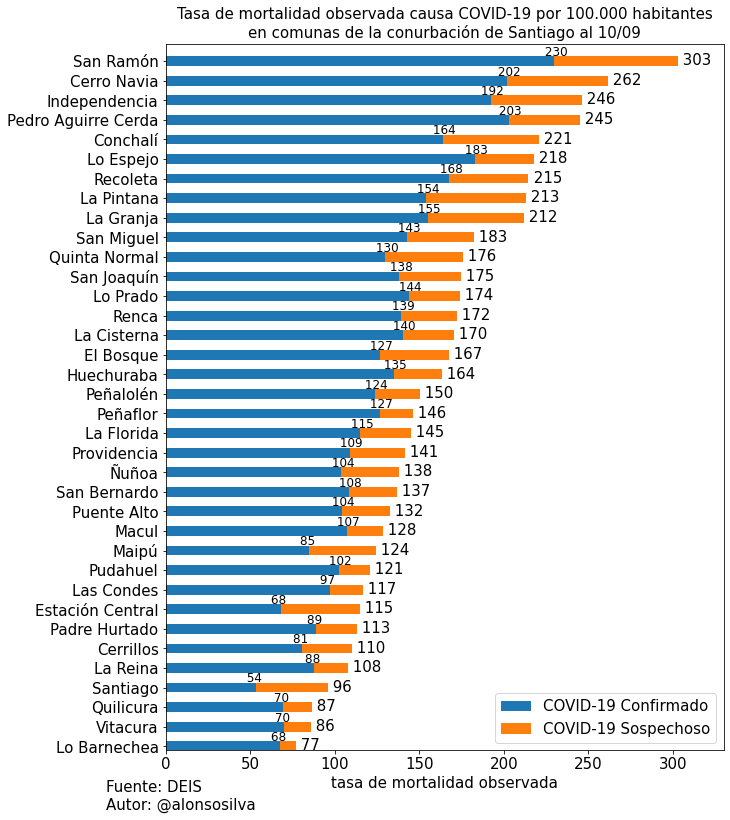

In [41]:
fig, ax = plt.subplots(figsize=(10,13))

aux.drop(columns="Tasa de mortalidad total").plot.barh(stacked=True, ax=ax)
for i, val in enumerate(aux['COVID-19 Confirmado']):
    ax.text(val-8, i+0.28,f" {val:.0f}", fontsize=12)
for i, val in enumerate(aux['Tasa de mortalidad total']):
    ax.text(val, i-0.2,f" {val:.0f}", fontsize=15)
ax.legend(fontsize=15)
ax.set_xlim(0,330)
ax.set_ylim(-.2,len(df)-.1)
ax.set_ylabel("", fontsize=15)
ax.set_xlabel("tasa de mortalidad observada", fontsize=15)
ax.set_title(f"Tasa de mortalidad observada causa COVID-19 por 100.000 habitantes\nen comunas de la conurbación de Santiago al {pd.to_datetime(report_date).strftime('%d/%m')}", fontsize=15)
plt.annotate('Fuente: DEIS\nAutor: @alonsosilva', (0,0), (-60,-30), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=15)
# plt.savefig('2020-09-10-Mortalidad-observada-por-comuna.png', bbox_inches='tight', format='png', dvi=8000)
plt.show()

In [42]:
# Create column sex (1=Hombre, 2=Mujer)
data_RM["sexo"] = (pd.get_dummies(data_RM["genero"], drop_first=True)+1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Pirámides poblacionales: 
- https://es.datachile.io/geo/region-metropolitana-santiago-13/vitacura-340#demographics
- https://es.datachile.io/geo/region-metropolitana-santiago-13/la-pintana-124#demographics

# Meses y días como año zero

In [43]:
data_RM["edad_tipo"] = data_RM["edad_tipo"].apply(lambda x: 1 if x==1 else 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
data_RM["edad"] = data_RM["edad"]*data_RM["edad_tipo"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Población estándar

In [45]:
# download INE 2002 data
censo2002 = pd.read_excel(
    #"https://github.com/alonsosilvaallende/COVID-19/blob/master/data/base-2002-(2014)-pa%C3%ADs-y-regiones_pob-total-e-indicadores.xlsx?raw=true",
    "http://www.ine.cl/docs/default-source/proyecciones-de-poblacion/cuadros-estadisticos/proyecciones-anteriores/base-2002-(actualizaci%C3%B3n-2014)/base-2002-(2014)-pa%C3%ADs-y-regiones_pob-total-e-indicadores.xlsx?sfvrsn=92d0b299_3",
    sheet_name="País")

In [46]:
censo2002.head()

,"POBLACIÓN POR SEXO, SEGÚN EDAD SIMPLE. 2002-2020",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,CHILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ambos Sexos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Edad,Años,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2002,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,NaN,NaN,NaN
4,0,242959,236880.0,232663.0,230568.0,230900.0,235457.0,242535.0,248363.0,250453.0,248203.0,244493.0,243846.0,246478.0,248803.0,249552.0,248757.0,247753.0,246560.0,245194.0,NaN,NaN,NaN


In [47]:
censo2002.iloc[90:171]

,"POBLACIÓN POR SEXO, SEGÚN EDAD SIMPLE. 2002-2020",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
90,0,123765,120950.0,118732.0,117869.0,118177.0,120206.0,123781.0,126645.0,127570.0,126634.0,124737.0,124112.0,125450.0,126633.0,127015.0,126615.0,126109.0,125505.0,124813.0,NaN,NaN,NaN
91,1,125464,123748.0,120937.0,118745.0,117907.0,118253.0,120310.0,123894.0,126769.0,127732.0,126827.0,124934.0,124311.0,125652.0,126836.0,127221.0,126821.0,126322.0,125718.0,NaN,NaN,NaN
92,2,128254,125489.0,123785.0,121007.0,118827.0,118029.0,118413.0,120478.0,124070.0,126979.0,127972.0,127075.0,125184.0,124566.0,125910.0,127090.0,127476.0,127077.0,126582.0,NaN,NaN,NaN
93,3,130931,128290.0,125539.0,123853.0,121104.0,118957.0,118195.0,118590.0,120662.0,124283.0,127229.0,128226.0,127331.0,125440.0,124822.0,126173.0,127355.0,127740.0,127342.0,NaN,NaN,NaN
94,4,133547,130981.0,128348.0,125622.0,123953.0,121244.0,119133.0,118381.0,118783.0,120884.0,124535.0,127489.0,128490.0,127592.0,125705.0,125086.0,126439.0,127621.0,128009.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,76,20256,20994.0,21684.0,22378.0,23022.0,23658.0,24282.0,25137.0,25970.0,26937.0,28178.0,29326.0,30422.0,31543.0,32831.0,34390.0,36068.0,37881.0,39740.0,NaN,NaN,NaN
167,77,18312,19105.0,19778.0,20415.0,21087.0,21686.0,22317.0,22981.0,23743.0,24592.0,25635.0,26824.0,27923.0,28972.0,30045.0,31280.0,32770.0,34377.0,36116.0,NaN,NaN,NaN
168,78,16286,17170.0,17893.0,18510.0,19126.0,19745.0,20340.0,21010.0,21587.0,22373.0,23303.0,24297.0,25432.0,26475.0,27480.0,28503.0,29684.0,31108.0,32641.0,NaN,NaN,NaN
169,79,14250,15179.0,15976.0,16635.0,17231.0,17792.0,18406.0,19051.0,19629.0,20243.0,21108.0,21997.0,22943.0,24023.0,25015.0,25976.0,26948.0,28074.0,29432.0,NaN,NaN,NaN


In [48]:
# create dataframe with the population per age, sex
data_censo2002 = pd.DataFrame()
data_censo2002["Sexo"] = [1 for i in np.arange(81)] + [2 for i in np.arange(81)]
data_censo2002["Edad"] = [i for i in np.arange(81)] + [i for i in np.arange(81)]
data_censo2002["Poblacion 2002"] = list(censo2002.iloc[90:171,1]) + list(censo2002.iloc[176:257,1])

In [49]:
# split in different dataframes for men and women
aux1 = data_censo2002.query("Sexo == 1").reset_index(drop=True)
aux2 = data_censo2002.query("Sexo == 2").reset_index(drop=True)

In [50]:
# join both dataframes (men and women)
proportion = pd.DataFrame()
proportion["proporciones"] = list(aux1["Poblacion 2002"]) + list(aux2["Poblacion 2002"])

In [51]:
# select county
comuna = "Maipú"

In [52]:
# select county population
county = county_population_RM.query(f"Comuna == '{comuna}'").drop(columns="Comuna")

In [53]:
# select county deaths
data_county = data_RM.query(f"comuna == '{comuna}'").drop(columns=["comuna"])

In [54]:
# create county dataframe with sex, age group, population
data_Maipu = pd.DataFrame()

In [55]:
data_Maipu["sexo"] = [1 for i in np.arange(81)] + [2 for i in np.arange(81)]

In [56]:
data_Maipu["edad"] = list(np.arange(81)) + list(np.arange(81))

In [57]:
data_Maipu["población"] = list(county["Poblacion 2020"])

In [58]:
# determine COVID deaths per each age-sex group
aux3 = []
for sexo in [1,2]:
    for edad in np.arange(80):
        aux3.append(len(data_county.query(f"sexo == {sexo} & edad == '{edad}'")))
    aux3.append(len(data_county.query(f"sexo == {sexo} & (edad >= 80)")))

In [59]:
data_Maipu["fallecidos COVID"] = aux3

In [60]:
data_Maipu["Tasa de mortalidad observada por grupo etario-sexo"] = 100000*data_Maipu["fallecidos COVID"]/data_Maipu["población"]

In [61]:
data_Maipu["Proporciones población estándar"] = proportion["proporciones"]/proportion["proporciones"].sum()

In [62]:
data_Maipu

,sexo,edad,población,fallecidos COVID,Tasa de mortalidad observada por grupo etario-sexo,Proporciones población estándar
0,1,0,3457,1,28.926815,0.007899
1,1,1,3402,0,0.000000,0.008008
2,1,2,3445,0,0.000000,0.008186
3,1,3,3566,0,0.000000,0.008356
4,1,4,3740,0,0.000000,0.008523
...,...,...,...,...,...,...
157,2,76,1130,12,1061.946903,0.001865
158,2,77,1039,8,769.971126,0.001728
159,2,78,958,12,1252.609603,0.001573
160,2,79,889,7,787.401575,0.001407


In [63]:
data_Maipu["Tasa de mortalidad observada por grupo etario-sexo"].dot(data_Maipu["Proporciones población estándar"])

97.0663950502686

In [64]:
def ajustada(comuna):
    # select county population
    county = county_population_RM.query(f"Comuna == '{comuna}'").drop(columns="Comuna")
    # select county deaths
    data_county = data_RM.query(f"comuna == '{comuna}'").drop(columns=["comuna"])
    # create county dataframe with sex, age group, population
    data_Maipu = pd.DataFrame()
    data_Maipu["sexo"] = [1 for i in np.arange(81)] + [2 for i in np.arange(81)]
    data_Maipu["edad"] = list(np.arange(81)) + list(np.arange(81))
    data_Maipu["población"] = list(county["Poblacion 2020"])
    # determine COVID deaths per each age-sex group
    aux3 = []
    for sexo in [1,2]:
        for edad in np.arange(80):
            aux3.append(len(data_county.query(f"sexo == {sexo} & edad == '{edad}'")))
        aux3.append(len(data_county.query(f"sexo == {sexo} & (edad >= 80)")))
    data_Maipu["fallecidos COVID"] = aux3
    data_Maipu["Tasa de mortalidad observada por grupo etario-sexo"] = 100000*data_Maipu["fallecidos COVID"]/data_Maipu["población"]
    data_Maipu["Proporciones población estándar"] = proportion["proporciones"]/proportion["proporciones"].sum()
    return data_Maipu["Tasa de mortalidad observada por grupo etario-sexo"].dot(data_Maipu["Proporciones población estándar"])

In [65]:
def ajustada_confirmado(comuna):
    # select county population
    county = county_population_RM.query(f"Comuna == '{comuna}'").drop(columns="Comuna")
    # select county deaths
    data_county = data_RM.query(f"comuna == '{comuna}'").drop(columns=["comuna"])
    # create county dataframe with sex, age group, population
    data_Maipu = pd.DataFrame()
    data_Maipu["sexo"] = [1 for i in np.arange(81)] + [2 for i in np.arange(81)]
    data_Maipu["edad"] = list(np.arange(81)) + list(np.arange(81))
    data_Maipu["población"] = list(county["Poblacion 2020"])
    # determine COVID deaths per each age-sex group
    aux3 = []
    for sexo in [1,2]:
        for edad in np.arange(80):
            aux3.append(len(data_county.query(f"sexo == {sexo} & edad == '{edad}' & c_causa_detalle == 'U071'")))
        aux3.append(len(data_county.query(f"sexo == {sexo} & (edad >= 80) & c_causa_detalle == 'U071'")))
    data_Maipu["fallecidos COVID"] = aux3
    data_Maipu["Tasa de mortalidad observada por grupo etario-sexo"] = 100000*data_Maipu["fallecidos COVID"]/data_Maipu["población"]
    data_Maipu["Proporciones población estándar"] = proportion["proporciones"]/proportion["proporciones"].sum()
    return data_Maipu["Tasa de mortalidad observada por grupo etario-sexo"].dot(data_Maipu["Proporciones población estándar"])

In [66]:
def ajustada_sospechoso(comuna):
    # select county population
    county = county_population_RM.query(f"Comuna == '{comuna}'").drop(columns="Comuna")
    # select county deaths
    data_county = data_RM.query(f"comuna == '{comuna}'").drop(columns=["comuna"])
    # create county dataframe with sex, age group, population
    data_Maipu = pd.DataFrame()
    data_Maipu["sexo"] = [1 for i in np.arange(81)] + [2 for i in np.arange(81)]
    data_Maipu["edad"] = list(np.arange(81)) + list(np.arange(81))
    data_Maipu["población"] = list(county["Poblacion 2020"])
    # determine COVID deaths per each age-sex group
    aux3 = []
    for sexo in [1,2]:
        for edad in np.arange(80):
            aux3.append(len(data_county.query(f"sexo == {sexo} & edad == '{edad}' & c_causa_detalle == 'U072'")))
        aux3.append(len(data_county.query(f"sexo == {sexo} & (edad >= 80) & c_causa_detalle == 'U072'")))
    data_Maipu["fallecidos COVID"] = aux3
    data_Maipu["Tasa de mortalidad observada por grupo etario-sexo"] = 100000*data_Maipu["fallecidos COVID"]/data_Maipu["población"]
    data_Maipu["Proporciones población estándar"] = proportion["proporciones"]/proportion["proporciones"].sum()
    return data_Maipu["Tasa de mortalidad observada por grupo etario-sexo"].dot(data_Maipu["Proporciones población estándar"])

In [67]:
ajustada_confirmado("Maipú")

66.04242680554223

In [68]:
ajustada_sospechoso("Maipú")

31.023968244726355

In [69]:
ajustada("Maipú")

97.0663950502686

In [70]:
# compute adjusted rate per county
adjusted = pd.DataFrame(columns = ['Comuna', 'COVID-19 Confirmado', 'COVID-19 Sospechoso', 'Total'], index = None)
for comuna in lista:
    adjusted = adjusted.append({'Comuna': comuna,
                                'COVID-19 Confirmado': ajustada_confirmado(f'{comuna}'),
                                'COVID-19 Sospechoso': ajustada_sospechoso(f'{comuna}'),
                     'Total': ajustada(f"{comuna}")}, ignore_index = True)

In [71]:
adjusted = adjusted.set_index('Comuna')

In [72]:
adjusted = adjusted.sort_values(by="Total")

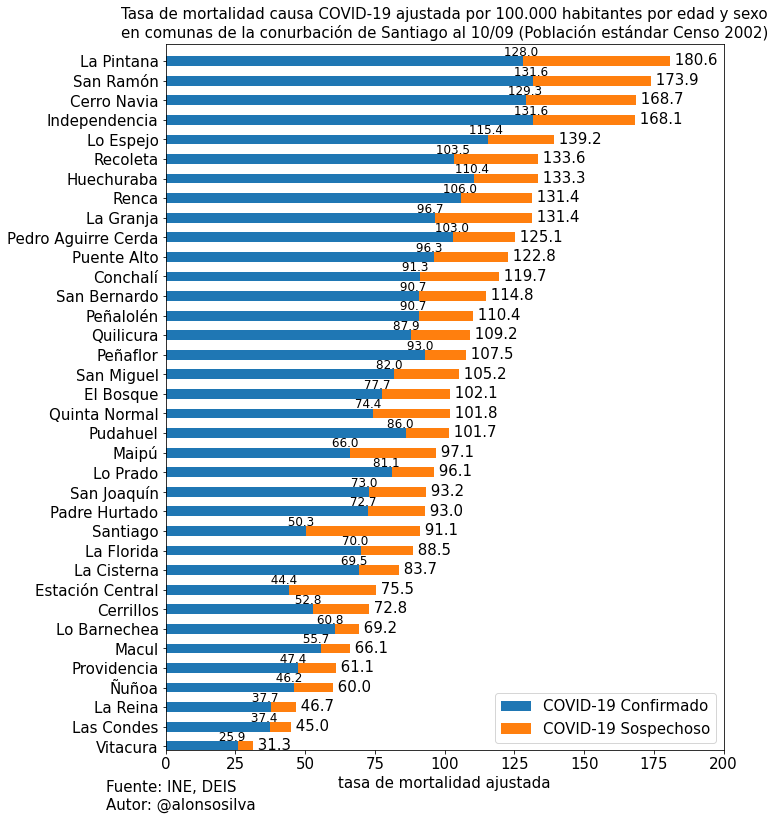

In [73]:
fig, ax = plt.subplots(figsize=(10,13))

adjusted.drop(columns="Total").plot.barh(stacked=True, ax=ax)
for i, val in enumerate(adjusted['COVID-19 Confirmado']):
    ax.text(val-8, i+0.28,f" {val:.1f}", fontsize=12)
for i, val in enumerate(adjusted['Total']):
    ax.text(val, i-0.2,f" {val:.1f}", fontsize=15)
ax.legend(fontsize=15)
ax.set_xlim(0,200)
ax.set_ylim(-.2,len(adjusted)-.1)
ax.set_ylabel("", fontsize=15)
ax.set_xlabel("tasa de mortalidad ajustada", fontsize=15)
plt.title(f"Tasa de mortalidad causa COVID-19 ajustada por 100.000 habitantes por edad y sexo\nen comunas de la conurbación de Santiago al {pd.to_datetime(report_date).strftime('%d/%m')} (Población estándar Censo 2002)", fontsize=15)
plt.annotate('Fuente: INE, DEIS\nAutor: @alonsosilva', (0,0), (-60,-30), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=15)
# plt.savefig('2020-09-11-Mortalidad-ajustada-por-comuna.png', bbox_inches='tight', format='png', dvi=8000)
plt.show()

In [74]:
import statsmodels.api as sm
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [75]:
import seaborn as sns

sns.set_style('white')
sns.set_style('ticks')

In [76]:
adjusted.head()

,COVID-19 Confirmado,COVID-19 Sospechoso,Total
Comuna,,,
Vitacura,25.854112,5.421546,31.275658
Las Condes,37.350706,7.690655,45.041361
La Reina,37.680923,9.014293,46.695216
Ñuñoa,46.190538,13.855460,60.045997
Providencia,47.437645,13.662316,61.099961


In [77]:
incidencia = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")

In [78]:
incidencia = incidencia.query("Region == 'Metropolitana'").drop(columns=["Region", "Codigo region"]).set_index("Comuna").T

In [79]:
data = adjusted.copy()

In [80]:
data.index = data.index.str.normalize("NFKD").str.encode('ascii', errors='ignore').str.decode('utf-8')

In [81]:
ti = incidencia[list(data.index)].loc["Tasa"]

In [82]:
data["Tasa de incidencia"] = ti

In [83]:
aux.index = aux.index.str.normalize("NFKD").str.encode('ascii', errors='ignore').str.decode('utf-8')

In [84]:
aux["Tasa de incidencia"] = ti

In [85]:
aux.head()

,COVID-19 Confirmado,COVID-19 Sospechoso,Tasa de mortalidad total,Tasa de incidencia
Comuna,,,,
Lo Barnechea,67.7,9.7,77.4,2909.5
Vitacura,70.3,15.5,85.8,1707.1
Quilicura,69.5,17.3,86.8,3799.9
Santiago,53.7,42.5,96.2,3124.3
La Reina,87.8,19.9,107.7,2415.9


In [86]:
slope, intercept, r_value, p_value, std_err = stats.linregress(aux["Tasa de mortalidad total"],aux["Tasa de incidencia"])
slope, intercept, r_value, p_value, std_err

(14.886460157229548,
 1540.3448947708612,
 0.7128973565200437,
 1.0691345728712351e-06,
 2.511361555846111)

Correlación: 
- https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/
- https://rpsychologist.com/d3/correlation/

In [87]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data["Total"],data["Tasa de incidencia"])
slope, intercept, r_value, p_value, std_err

(24.573700103198597,
 1373.7305431396271,
 0.7921240525640394,
 8.654453970330572e-09,
 3.2473122419988507)

In [88]:
!pip install -q adjustText

In [89]:
from adjustText import adjust_text

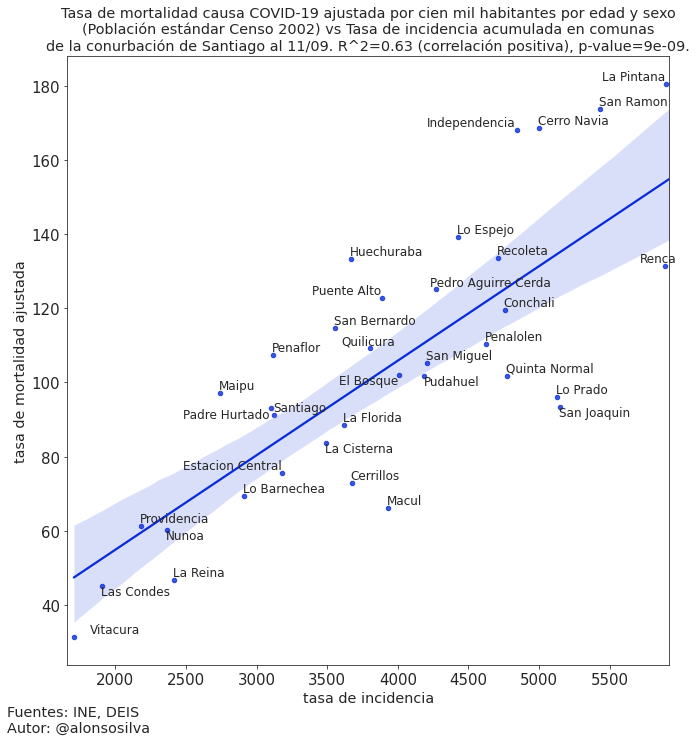

In [90]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(data["Tasa de incidencia"], data["Total"], color = '#092CDB', line_kws={'label':'$GE=%2.5s*log(PIB)+%2.3s$'%(slope, intercept)},scatter_kws={'s':20});

texts = [plt.annotate(txt, (data["Tasa de incidencia"].iloc[i], data["Total"].iloc[i]), textcoords="offset points", xytext=(-1,1), fontsize="large") for i, txt in enumerate(data.index)]
adjust_text(texts)
ax.set_title(f"Tasa de mortalidad causa COVID-19 ajustada por cien mil habitantes por edad y sexo\n(Población estándar Censo 2002) vs Tasa de incidencia acumulada en comunas\nde la conurbación de Santiago al 11/09. R^2={r_value**2:.2f} (correlación positiva), p-value={p_value:.0e}.", fontsize='x-large')
ax.set_xlabel(f'tasa de incidencia', fontsize='x-large')
ax.set_ylabel(f"tasa de mortalidad ajustada", fontsize="x-large")
ax.set_xlim(1660,5920)
fig.tight_layout()
plt.annotate('Fuentes: INE, DEIS\nAutor: @alonsosilva', (0,0), (-60,-40), fontsize='x-large', xycoords='axes fraction', textcoords='offset points', va='top')
# plt.savefig('2020-09-05-Tasa-Ajustada-vs-TI.svg', bbox_inches='tight', format='svg')
plt.show()

Datos: http://observatorio.ministeriodesarrollosocial.gob.cl/indicadores/datos_pobreza_comunal.php

In [91]:
pobreza = pd.read_excel("http://observatorio.ministeriodesarrollosocial.gob.cl/documentos/PLANILLA_Estimaciones_comunales_tasa_pobreza_por_ingresos_multidimensional_2017.xlsx", sheet_name="Multidimensional 2017")

In [92]:
pobreza.head()

,"Estimaciones de Tasa de Pobreza Multidimensional por Comuna, Aplicación de Metodologías de Estimación para Áreas Pequeñas (SAE), 2017",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Código,Región,Nombre comuna,Número de personas en situación de pobreza mul...,Porcentaje de personas en situación de pobreza...,Límite inferior,Límite superior,Metodología de Estimación
2,1101,I de Tarapacá,Iquique,33283,0.197384,0.180161,0.216825,SAE
3,1107,I de Tarapacá,Alto Hospicio,33108,0.275451,0.257526,0.290994,SAE
4,1401,I de Tarapacá,Pozo Almonte,6581,0.388117,0.336295,0.489958,SAE


In [93]:
pobreza = pobreza.rename(columns = {"Unnamed: 1":"region", "Unnamed: 2":"comuna", "Unnamed: 4":"porcentaje"})

In [94]:
pobreza = pobreza.query("region == 'XIII Metropolitana de Santiago'")[["comuna", "porcentaje"]]

In [95]:
pobreza = pobreza.set_index("comuna")

In [96]:
adjusted["Pobreza"] = pobreza

In [97]:
adjusted

,COVID-19 Confirmado,COVID-19 Sospechoso,Total,Pobreza
Comuna,,,,
Vitacura,25.854112,5.421546,31.275658,0.0348281
Las Condes,37.350706,7.690655,45.041361,0.0423259
La Reina,37.680923,9.014293,46.695216,0.0693621
Ñuñoa,46.190538,13.855460,60.045997,0.0576182
Providencia,47.437645,13.662316,61.099961,0.0338355
Macul,55.696827,10.421231,66.118058,0.13473
Lo Barnechea,60.808947,8.435205,69.244152,0.171827
Cerrillos,52.839219,20.006254,72.845473,0.274218
Estación Central,44.382098,31.085777,75.467874,0.234549


In [98]:
adjusted["Pobreza"] = adjusted["Pobreza"].astype(float)

In [99]:
slope, intercept, r_value, p_value, std_err = stats.linregress(adjusted["Total"], adjusted["Pobreza"])
slope, intercept, r_value, p_value, std_err

(0.001833431628804539,
 0.012501434931744854,
 0.7693742745702499,
 4.180856952106155e-08,
 0.0002610666094913584)

In [100]:
r_value**2

0.5919367743704982

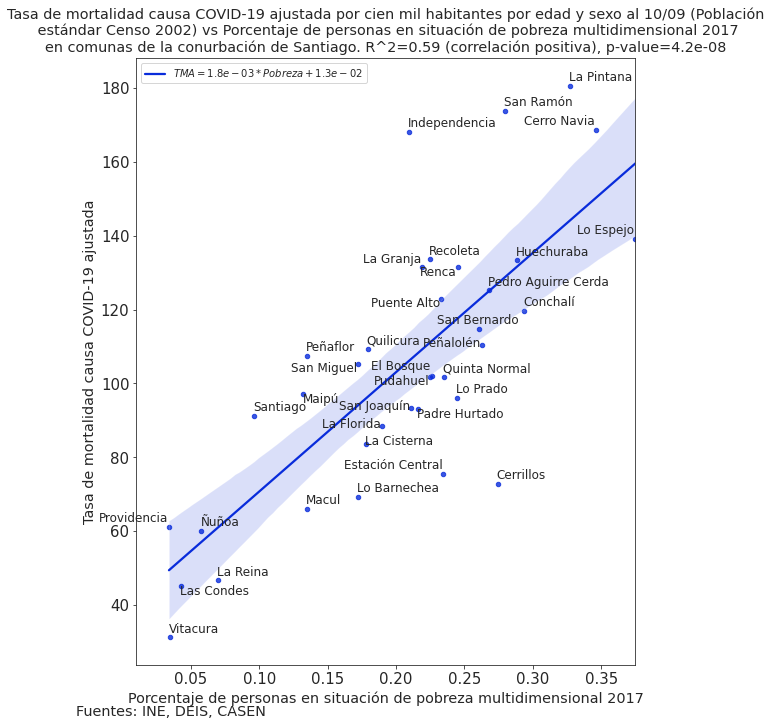

In [102]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(adjusted["Pobreza"], adjusted["Total"], color = '#092CDB', line_kws={'label':f'$TMA={slope:.1e}*Pobreza+{intercept:.1e}$'},scatter_kws={'s':20});
texts = [plt.annotate(txt, (adjusted["Pobreza"].iloc[i], adjusted["Total"].iloc[i]), textcoords="offset points", xytext=(-1,2), fontsize="large") for i, txt in enumerate(adjusted.index)]
adjust_text(texts)
ax.set_title(f"Tasa de mortalidad causa COVID-19 ajustada por cien mil habitantes por edad y sexo al {pd.to_datetime(report_date).strftime('%d/%m')} (Población\n estándar Censo 2002) vs Porcentaje de personas en situación de pobreza multidimensional 2017\nen comunas de la conurbación de Santiago. R^2={r_value ** 2:.2f} (correlación positiva), p-value={p_value:.1e}", fontsize='x-large')
ax.set_xlabel(f'Porcentaje de personas en situación de pobreza multidimensional 2017', fontsize='x-large')
ax.set_ylabel(f"Tasa de mortalidad causa COVID-19 ajustada", fontsize="x-large")
ax.set_xlim(0.01,)
ax.legend(loc='upper left')
fig.tight_layout()
plt.annotate('Fuentes: INE, DEIS, CASEN', (0,0), (-60,-40), fontsize='x-large', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('2020-09-05-Tasa-Ajustada-vs-Pobreza.svg', bbox_inches='tight', format='svg')
# plt.show()